<a href="https://colab.research.google.com/github/Reece-Ogidih/Options---BTC-ETH-Analysis/blob/main/Options_BTC_ETH_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests # used for webscraping - i.e. getting info from a website (derebit)
import sqlite3 # used to connect to a database, you store your data in the database using sqlite3
import pandas as pd # python library - use for data manipulation
import numpy as np # used for maths
import datetime # used for date operations
from math import pi, sin # mathematical functions
from matplotlib import pyplot as plt # graph plotting

In [2]:
# Formatting dates for this Friday's expiration and next Friday's:
today = datetime.date.today()
friday = today + datetime.timedelta( (4-today.weekday()) % 7 )
next_friday = friday + datetime.timedelta(7)

friday = (datetime.date.strftime(friday, "%d%b%y")).upper()
if friday[0] == "0":
    friday = friday[1:]

next_friday = (datetime.date.strftime(next_friday, "%d%b%y")).upper()
if next_friday[0] == "0":
    next_friday = next_friday[1:]

friday, next_friday

('27OCT23', '3NOV23')

In [3]:
#Bitcoin strike prices
ints = np.arange(10000, 30000, 1000).tolist()
strike_prices = [str(x) for x in ints]
# The strike price is the predetermined price at which the holder of an option can buy (for a call option) or sell (for a put option) the underlying asset

#API call formatting
token = "BTC" # or ('ETH')
expiration_date = [friday, next_friday]

#P=put C=call:
option_type = "C"
# Put options give the holder the right, but not the obligation, to sell an underlying asset at a specified price within a specified time period.
# Call options give the holder the right, but not the obligation, to buy an underlying asset at a specified price within a specified time period.

raw_strike_data=[]

for date in expiration_date:
    for strike in strike_prices:
        string = "https://test.deribit.com/api/v2/public/get_book_summary_by_instrument?instrument_name="+token+"-"+date+"-"+strike+"-"+option_type
        result = requests.get(string).json()
        if 'error' not in result:
            raw_strike_data.append([token, date, strike, result["result"][0]['volume'], result["result"][0]['open_interest'], result["result"][0]['underlying_price']])

strike_price_df = pd.DataFrame(raw_strike_data, columns =['Token','Expiration Date', 'Strike Price','Volume','Open Interest','Underlying Price'])
print(strike_price_df)

   Token Expiration Date Strike Price  Volume  Open Interest  Underlying Price
0    BTC         27OCT23        18000     0.0            0.3          29861.47
1    BTC         27OCT23        20000     0.0            0.1          29861.32
2    BTC         27OCT23        21000     0.0            0.0          29861.32
3    BTC         27OCT23        22000     0.0           87.6          29861.38
4    BTC         27OCT23        23000     0.0           65.4          29861.38
5    BTC         27OCT23        24000     0.0          199.7          29861.53
6    BTC         27OCT23        25000     0.0          107.7          29861.53
7    BTC         27OCT23        26000     0.0          118.5          29861.53
8    BTC         27OCT23        27000     0.0          186.5          29861.38
9    BTC         27OCT23        28000  1515.0          686.2          29861.38
10   BTC         27OCT23        29000     0.0          348.1          29861.38
11   BTC          3NOV23        15000     0.0       

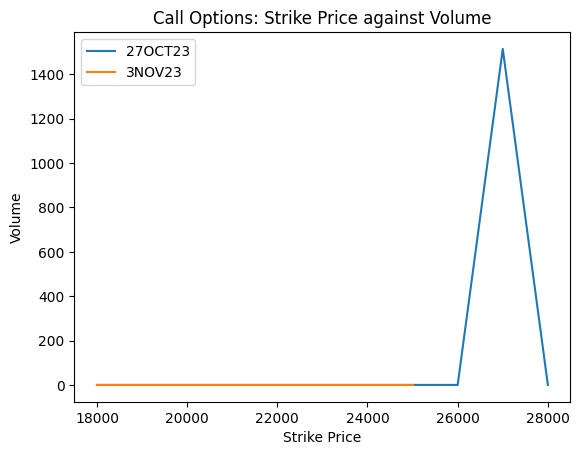

In [4]:
# PLOTS
#Graph 1 will denote Volume against Strike price between friday and next_friday (Call options)
y1 = []
y2 = []
for date in expiration_date:
    for strike in strike_prices:
        string = "https://test.deribit.com/api/v2/public/get_book_summary_by_instrument?instrument_name="+token+"-"+date+"-"+strike+"-"+option_type
        result = requests.get(string).json()
        if 'error' not in result:
          if date == friday:
            y1.append(result["result"][0]['volume'])
          elif date == next_friday:
            y2.append(result["result"][0]['volume'])

x1 = [*range(18000, 18000 + len(y1)*1000, 1000)]
plt.plot(x1, y1, label = friday)

x2 = [*range(18000, 18000 + len(y2)*1000, 1000)]
plt.plot(x2, y2, label = next_friday)

plt.xlabel('Strike Price')
plt.ylabel('Volume')
plt.title('Call Options: Strike Price against Volume')
plt.legend()
plt.show()

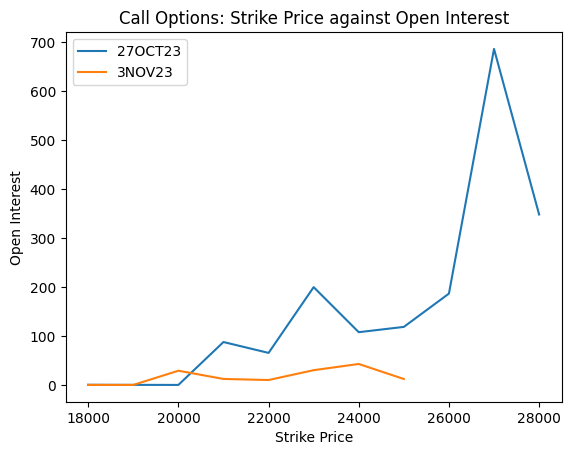

In [5]:
#Graph 2 will denote Open Interest against Strike price between friday and next_friday(Call options)
y3 = []
y4 = []
for date in expiration_date:
    for strike in strike_prices:
        string = "https://test.deribit.com/api/v2/public/get_book_summary_by_instrument?instrument_name="+token+"-"+date+"-"+strike+"-"+option_type
        result = requests.get(string).json()
        if 'error' not in result:
          if date == friday:
            y3.append(result["result"][0]['open_interest'])
          elif date == next_friday:
            y4.append(result["result"][0]['open_interest'])

x3 = [*range(18000, 18000 + len(y3)*1000, 1000)]
plt.plot(x3, y3, label = friday)

x4 = [*range(18000, 18000 + len(y4)*1000, 1000)]
plt.plot(x4, y4, label = next_friday)

plt.xlabel('Strike Price')
plt.ylabel('Open Interest')
plt.title('Call Options: Strike Price against Open Interest')
plt.legend()
plt.show()

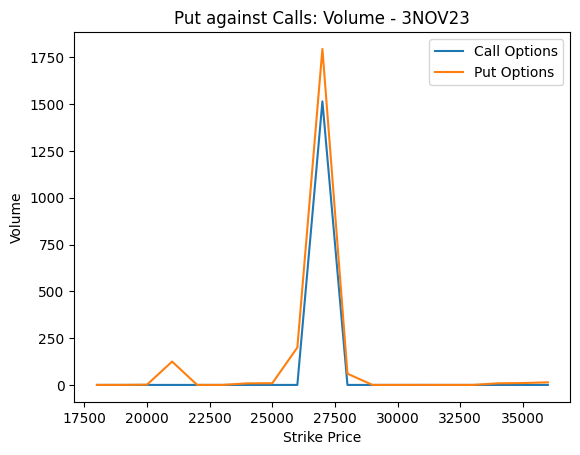

In [6]:
#Graph 3 will analyse the differences between put and call options popularities w.r.t Volume on the given expiration updating via the URL

#quick comparative def
option_type = "C"
option_type2 = "P"

y5 = []
y6 = []

for date in expiration_date:
    for strike in strike_prices:
        string = "https://test.deribit.com/api/v2/public/get_book_summary_by_instrument?instrument_name="+token+"-"+date+"-"+strike+"-"+option_type
        result = requests.get(string).json()
        if 'error' not in result:
            y5.append(result["result"][0]['volume'])

for date in expiration_date:
    for strike in strike_prices:
        string = "https://test.deribit.com/api/v2/public/get_book_summary_by_instrument?instrument_name="+token+"-"+date+"-"+strike+"-"+option_type2
        result = requests.get(string).json()
        if 'error' not in result:
          y6.append(result["result"][0]['volume'])


x5 = [*range(18000, 18000 + len(y5)*1000, 1000)]
plt.plot(x5, y5, label = 'Call Options')
x6 = [*range(18000, 18000 + len(y6) * 1000, 1000)]
plt.plot(x6, y6, label = 'Put Options')

plt.xlabel('Strike Price')
plt.ylabel('Volume')
plt.title('Put against Calls: Volume - ' + next_friday)
plt.legend()
plt.show()

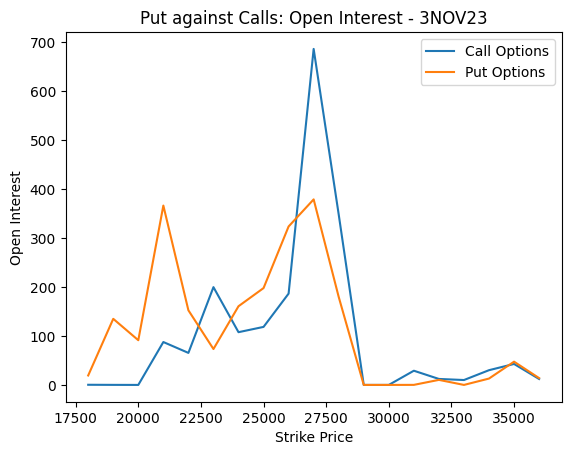

In [7]:
# Graph 4 will analyse the differences between put and call options popularities w.r.t Open Interest on the given expiration from the URL
y7 = []
y8 = []
for date in expiration_date:
    for strike in strike_prices:
        string = "https://test.deribit.com/api/v2/public/get_book_summary_by_instrument?instrument_name="+token+"-"+date+"-"+strike+"-"+option_type
        result = requests.get(string).json()
        if 'error' not in result:
            y7.append(result["result"][0]['open_interest'])

for date in expiration_date:
    for strike in strike_prices:
        string = "https://test.deribit.com/api/v2/public/get_book_summary_by_instrument?instrument_name="+token+"-"+date+"-"+strike+"-"+option_type2
        result = requests.get(string).json()
        if 'error' not in result:
            y8.append(result["result"][0]['open_interest'])

x7 = [*range(18000, 18000 + len(y7) * 1000, 1000)]
plt.plot(x7, y7, label = 'Call Options')

x8 = [*range(18000, 18000 + len(y8) * 1000, 1000)]
plt.plot(x8, y8, label = 'Put Options')

plt.xlabel('Strike Price')
plt.ylabel('Open Interest')
plt.title('Put against Calls: Open Interest - ' + next_friday)
plt.legend()
plt.show()